/Users/jenna/18687/sdl/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


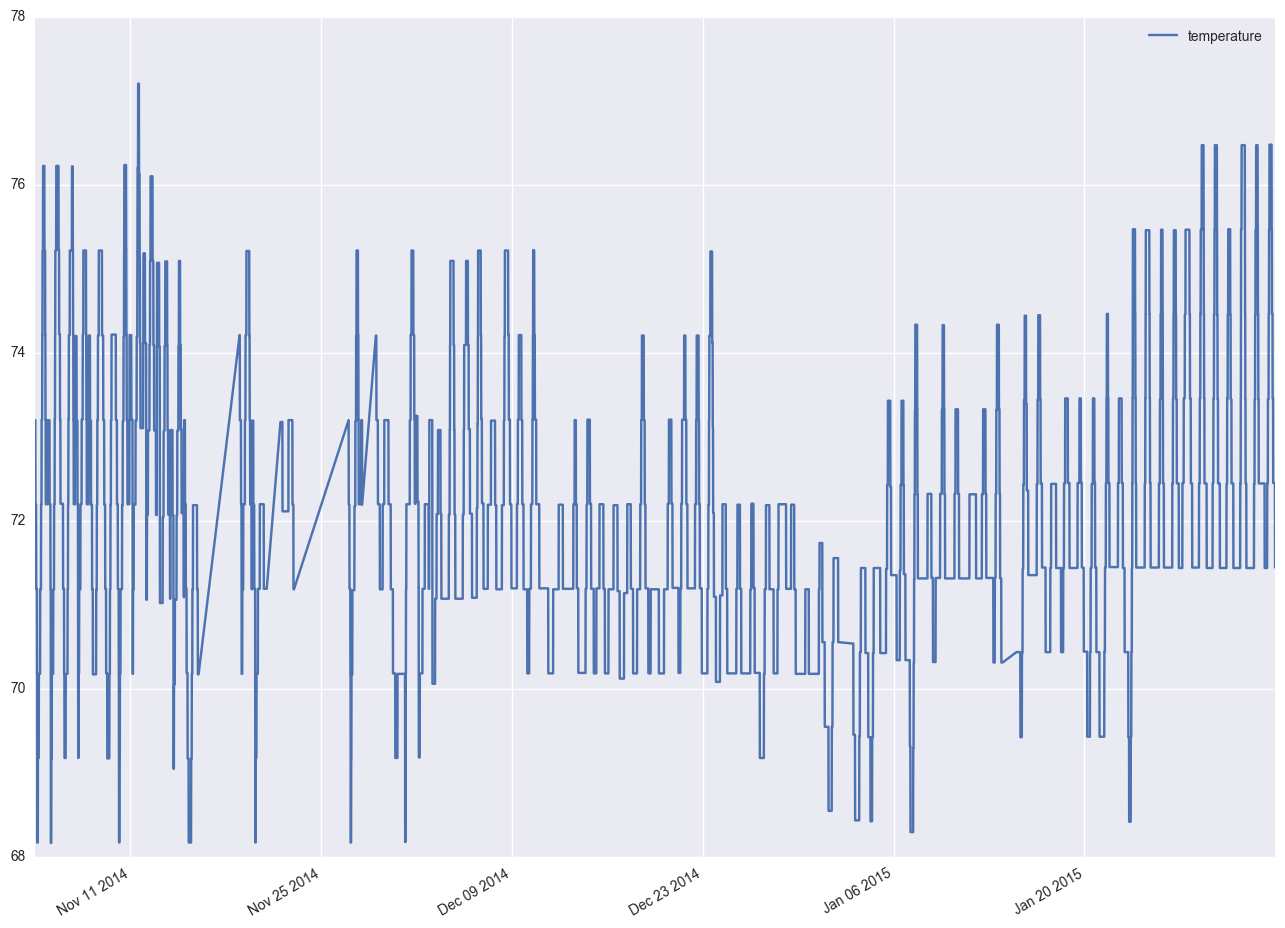

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pyflux as pf

from readers.mat_reader import MatReader

mat_reader = MatReader('ColdComplaintData/Training')
ts, xs, ys = mat_reader.read()
df = pd.DataFrame(ys, index=ts, columns=['temperature'])
df.plot(figsize=(16, 12))

model = pf.ARIMA(data=df,ar=4,ma=4,integ=0,target='temperature')

In [2]:
x = model.fit("MLE")
x.summary()

ARIMA(4,0,4)                                                                                              
======================================================= ==================================================
Dependent Variable: temperature                         Method: MLE                                       
Start Date: 2015-01-29 00:20:00                         Log Likelihood: -12849.229                        
End Date: 2015-01-26 23:55:00                           AIC: 25718.4579                                   
Number of observations: 23034                           BIC: 25798.9052                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 71.8489    0.4934     145.6303 0.0      (70.8819 | 72.8159)      
AR(1)                                

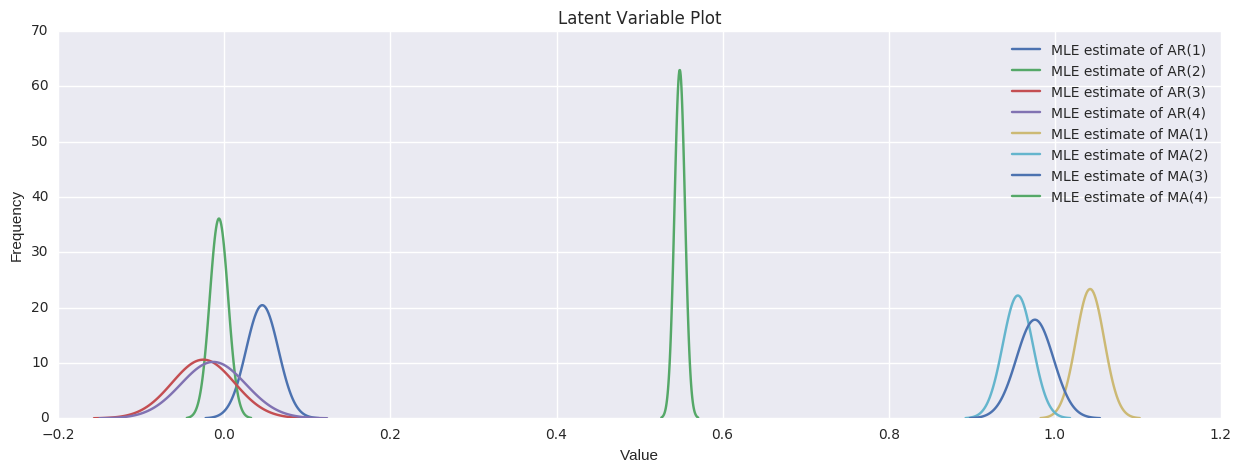

In [15]:
model.plot_z(indices=range(1,9))

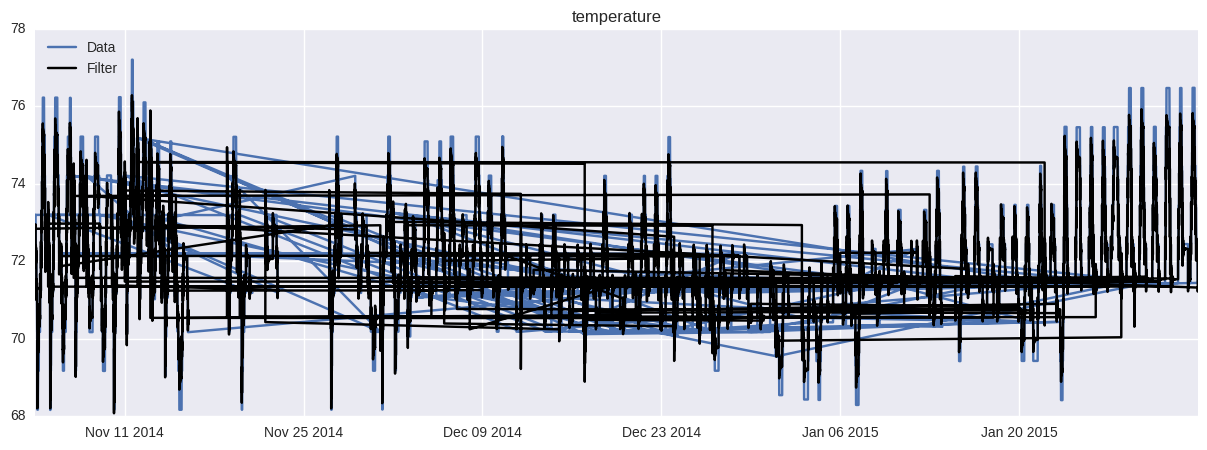

In [3]:
model.plot_fit(figsize=(15,5))

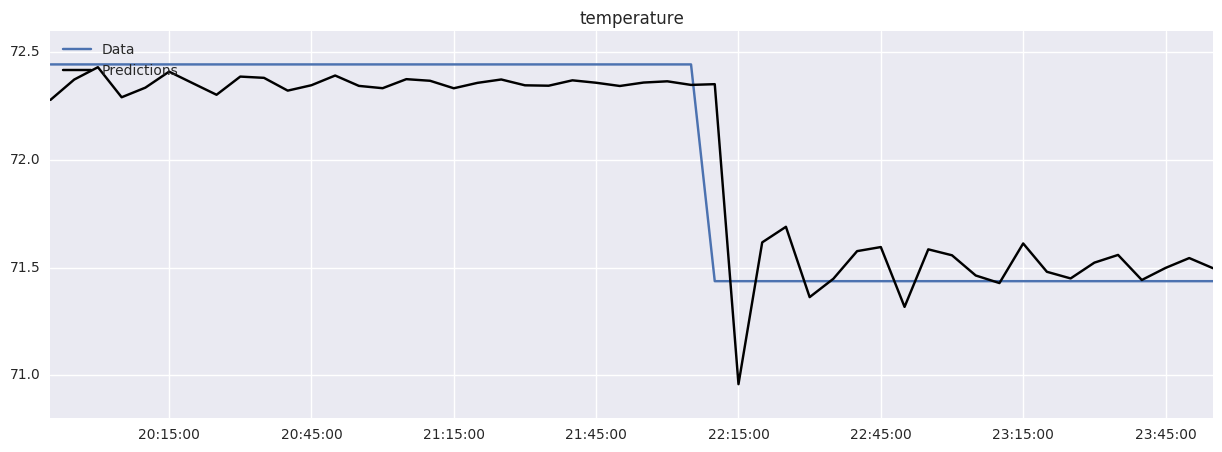

In [16]:
model.plot_predict_is(50,figsize=(15,5))

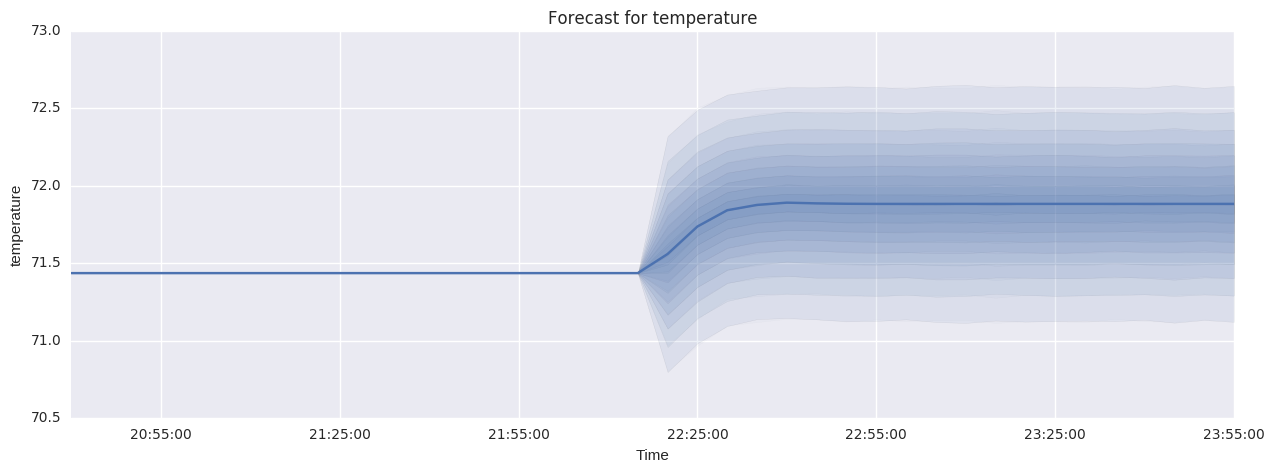

In [18]:
model.plot_predict(h=20,past_values=20,figsize=(15,5))

In [19]:
model.predict(h=20)

,temperature
2015-01-27 22:20:00,71.560087
2015-01-27 22:25:00,71.737475
2015-01-27 22:30:00,71.842471
2015-01-27 22:35:00,71.876855
2015-01-27 22:40:00,71.891473
2015-01-27 22:45:00,71.886893
2015-01-27 22:50:00,71.884320
2015-01-27 22:55:00,71.883404
2015-01-27 23:00:00,71.883301
2015-01-27 23:05:00,71.883428
